Versi Data yang digunain

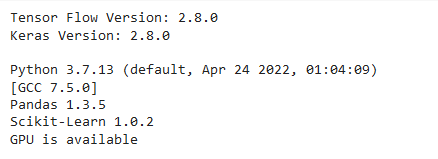

In [1]:
import tensorflow as tf
import sys 
import pandas as pd
import tensorflow
import sklearn as sk

check_gpu = len(tf.config.list_physical_devices('GPU'))>0

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if check_gpu \
      else "NOT AVAILABLE")

Tensor Flow Version: 2.8.0
Keras Version: 2.8.0

Python 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
Pandas 1.2.4
Scikit-Learn 1.1.1
GPU is available


In [2]:
import pandas as pd

def load_data():
  data = pd.read_csv('Dataset_HaloDoc.csv')
  return data

df = load_data()
df.head()

,userName,score,at,content
0,Robingah masdar,5,2022-05-17 12:32:23,"Jadi gampang konsultasi dari rumah,"
1,Aznayfa Eriyawan,5,2022-05-17 09:16:10,sangat membantu
2,Halim Abdul,2,2022-05-17 07:58:37,"Aplikasi cacat,download kartu kendali ga bisa2..."
3,Bambang Oetarman,5,2022-05-17 07:15:32,Salut dgn tetap menjaga kualitas pelayanannya....
4,Yudiono Putranto,5,2022-05-17 07:08:12,Mudah dan terpercaya


## Preprocessing

In [3]:
# Merubah menjadi huruf kecil
df['cleaned_content'] = df['content'].apply(lambda x: x.lower())
df.tail()

,userName,score,at,content,cleaned_content
19828,Ardiaz Atmadeva,5,2018-09-12 20:42:15,"Terimakasih, Sangat membantu, semoga kedepanny...","terimakasih, sangat membantu, semoga kedepanny..."
19829,Nikander Andrinanta,5,2018-09-12 17:32:54,"Pelayanan yg luar biasa, tengah malam tetap di...","pelayanan yg luar biasa, tengah malam tetap di..."
19830,Pengguna Google,5,2018-09-12 16:20:07,"Terimakasih, aplikasi yg sangat membantu dan p...","terimakasih, aplikasi yg sangat membantu dan p..."
19831,Beta Sari,5,2018-09-12 11:12:24,"Aplikasinya bagus, dokternya juga ramah pesan ...","aplikasinya bagus, dokternya juga ramah pesan ..."
19832,riyan tetsuya,5,2018-09-12 08:56:57,Aplikasi yang sangat membatu apa lg klw banyak...,aplikasi yang sangat membatu apa lg klw banyak...


In [4]:
import re 
import string

#cleaning data 
def textClean(text):
  text = re.sub(r'@[A-za-z0-9]+', '', text) #removing @mentions
  text = re.sub('[0-9]+', '', text) #removing number
  text = re.sub(r'#', '', text) #removing '#' symbol
  text = re.sub(r'RT[\s]+', '', text) #removing RT
  text = re.sub(r'#', '', text) #removing '#' symbol
  text = re.sub(r'[\n]+', '', text) #remove new line
  text = re.sub(r"^\s+|\s+$", "", text) #remove leading and trailing spaces in a word using OR sign to delete both
  text = re.sub(r" +", " ", text) #remove multiple space betwen words
  text = re.sub(r'http\S+', '', text) #yang ini yang buat remove https
  text = re.sub(r"\b[a-zA-Z]\b", "", text) #removing single char
  text = re.sub('\s+', ' ', text) #removing multiple whitespace
  text = re.sub(r'\W', " ", text)
  text = text.replace('\\t', ' ').replace('\\n', ' ').replace('\\u', ' ').replace('\\', ' ')#remove tab, new line, and back slice
  text = re.sub(r'[^\w\s]', ' ', text) #remove puntuation $ emoji (remove all besides \w > word dan \s > space)
  text = re.sub(r"²|¹|³|⁰|ⁱ|⁴|⁵|⁶|⁷|⁸|⁹|⁺|⁻|⁽|⁾|ⁿ]+", "", text) #ilangin pangkat
  text = re.sub(r'_', '',text) #ilangin garisbawah
  text = text.translate(str.maketrans("", "", string.punctuation)) #ilangin punctuation(,:';)
  return text

df['cleaning_data'] = df['cleaned_content'].apply(lambda x: textClean(x))
df.head()

,userName,score,at,content,cleaned_content,cleaning_data
0,Robingah masdar,5,2022-05-17 12:32:23,"Jadi gampang konsultasi dari rumah,","jadi gampang konsultasi dari rumah,",jadi gampang konsultasi dari rumah
1,Aznayfa Eriyawan,5,2022-05-17 09:16:10,sangat membantu,sangat membantu,sangat membantu
2,Halim Abdul,2,2022-05-17 07:58:37,"Aplikasi cacat,download kartu kendali ga bisa2...","aplikasi cacat,download kartu kendali ga bisa2...",aplikasi cacat download kartu kendali ga bisa ...
3,Bambang Oetarman,5,2022-05-17 07:15:32,Salut dgn tetap menjaga kualitas pelayanannya....,salut dgn tetap menjaga kualitas pelayanannya....,salut dgn tetap menjaga kualitas pelayanannya ...
4,Yudiono Putranto,5,2022-05-17 07:08:12,Mudah dan terpercaya,mudah dan terpercaya,mudah dan terpercaya


In [5]:
#hapus karakter berulang
# Fungsi menghapus karakter berulang
def replace_repeat_character(text):
    # Pattern to look for three or more repetitions of any character, including newlines (contoh goool -> gol).
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1", text)

df['stopword_comment'] = df['cleaning_data'].apply(replace_repeat_character) 

In [6]:
# Merubah kata alay menjadi kata baku
dict = {row[0] : row[1] for _, row in pd.read_csv("Kamus/kbba_fix.txt", delimiter = "\t").iterrows()}

def kbba(text): 
    token = text.split()
    final_string = ' '.join(str(dict.get(word, word)) for word in token)
    return final_string

df['Normalization'] = df['stopword_comment'].apply(lambda x: kbba(x))
df.head()

,userName,score,at,content,cleaned_content,cleaning_data,stopword_comment,Normalization
0,Robingah masdar,5,2022-05-17 12:32:23,"Jadi gampang konsultasi dari rumah,","jadi gampang konsultasi dari rumah,",jadi gampang konsultasi dari rumah,jadi gampang konsultasi dari rumah,jadi gampang konsultasi dari rumah
1,Aznayfa Eriyawan,5,2022-05-17 09:16:10,sangat membantu,sangat membantu,sangat membantu,sangat membantu,sangat membantu
2,Halim Abdul,2,2022-05-17 07:58:37,"Aplikasi cacat,download kartu kendali ga bisa2...","aplikasi cacat,download kartu kendali ga bisa2...",aplikasi cacat download kartu kendali ga bisa ...,aplikasi cacat download kartu kendali ga bisa ...,aplikasi cacat download kartu kendali tidak bi...
3,Bambang Oetarman,5,2022-05-17 07:15:32,Salut dgn tetap menjaga kualitas pelayanannya....,salut dgn tetap menjaga kualitas pelayanannya....,salut dgn tetap menjaga kualitas pelayanannya ...,salut dgn tetap menjaga kualitas pelayananya h...,salut dengan tetap menjaga kualitas pelayanany...
4,Yudiono Putranto,5,2022-05-17 07:08:12,Mudah dan terpercaya,mudah dan terpercaya,mudah dan terpercaya,mudah dan terpercaya,mudah dan terpercaya


In [7]:
# Menghapus baris yang mengandung noise
def noise(text): 
    text = text.split()
    listStopword =  ['cs','nya','mei','pun','an','yaa','jm','yaaa','pas','cod','eh','lah','sih','deh','kan','dok','kok',
                     'ba','ko','job','lot','jam','si','hahahaha','yaah','wib','tuk','mau','mantab','sd','rb','do','he',
                     'in','min','tkp','tfk','urge','adl','kes','waw','ui','yra','gaj','oj','mnit','bravo','ny','atw',
                     'wah','sp','euy','duly','nge','ibi','dn','ane','siy','ss','sc','tu','wa','mbok','supe','kg','trf',
                     'wkwkw','wkkwwk','wkwww','wkwkwk','wkwkwkw','wkkakakakak','wkwkwkwkwkwk','woy','woyy','woi','jos',
                     'yh','josss','ba','ih','loh','lha','lho','iya','ckckckck','yaa','besti','mantaf','ajibbbb','niih',
                     'nihh','wow','bosq','bos','ku','ah','ya','via','mah','fc','oi','hahah','hahaha','ahhahahaha','bhaha',
                     'wuahh','neng','puaaasss','skaliiiiiii','lahh','fak','hadeuhh','hhmm','hmm','hmmm','mantaffff',
                     'mantapp','mantabs','bgttt','mantabbb','mntap','pdkt','ahhh','sihh','cok','wahh','aaaaaaaa']

    text = [i for i in text if not i in listStopword]
    text = " ".join(text)
    return text

df['Remove_noise'] = df['Normalization'].apply(lambda x: noise(x))

In [8]:
df['Remove_noise'] = df['Remove_noise'].astype(str)

In [9]:
df.isnull().sum()

userName            0
score               0
at                  0
content             0
cleaned_content     0
cleaning_data       0
stopword_comment    0
Normalization       0
Remove_noise        0
dtype: int64

In [10]:
df.head()

,userName,score,at,content,cleaned_content,cleaning_data,stopword_comment,Normalization,Remove_noise
0,Robingah masdar,5,2022-05-17 12:32:23,"Jadi gampang konsultasi dari rumah,","jadi gampang konsultasi dari rumah,",jadi gampang konsultasi dari rumah,jadi gampang konsultasi dari rumah,jadi gampang konsultasi dari rumah,jadi gampang konsultasi dari rumah
1,Aznayfa Eriyawan,5,2022-05-17 09:16:10,sangat membantu,sangat membantu,sangat membantu,sangat membantu,sangat membantu,sangat membantu
2,Halim Abdul,2,2022-05-17 07:58:37,"Aplikasi cacat,download kartu kendali ga bisa2...","aplikasi cacat,download kartu kendali ga bisa2...",aplikasi cacat download kartu kendali ga bisa ...,aplikasi cacat download kartu kendali ga bisa ...,aplikasi cacat download kartu kendali tidak bi...,aplikasi cacat download kartu kendali tidak bi...
3,Bambang Oetarman,5,2022-05-17 07:15:32,Salut dgn tetap menjaga kualitas pelayanannya....,salut dgn tetap menjaga kualitas pelayanannya....,salut dgn tetap menjaga kualitas pelayanannya ...,salut dgn tetap menjaga kualitas pelayananya h...,salut dengan tetap menjaga kualitas pelayanany...,salut dengan tetap menjaga kualitas pelayanany...
4,Yudiono Putranto,5,2022-05-17 07:08:12,Mudah dan terpercaya,mudah dan terpercaya,mudah dan terpercaya,mudah dan terpercaya,mudah dan terpercaya,mudah dan terpercaya


In [11]:
df.to_csv('Preprocessing.csv', encoding='utf8', index=False)

In [11]:
df1 = df.copy()
df1.drop(df1.columns[[0,1,2,3,4,5,6,7]], axis = 1, inplace = True)
df1.drop_duplicates(keep=False,inplace=True)
df1.reset_index(drop=True, inplace=True)

In [12]:
df1.head()

,Remove_noise
0,jadi gampang konsultasi dari rumah
1,aplikasi cacat download kartu kendali tidak bi...
2,salut dengan tetap menjaga kualitas pelayanany...
3,mudah dan terpercaya
4,mudah dan sangat membantu terimakasih


## Visualisasi Gambar

In [13]:
import matplotlib.pyplot
import seaborn as sns

comment_words=''

for val in df1.Remove_noise:  
    # merubah val menjadi string
    val = str(val)
  
    # memisahkan variabel val per kata
    tokens = val.split() 
      
    # Mengonversi variabel val menjadi huruf kecil
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

In [14]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


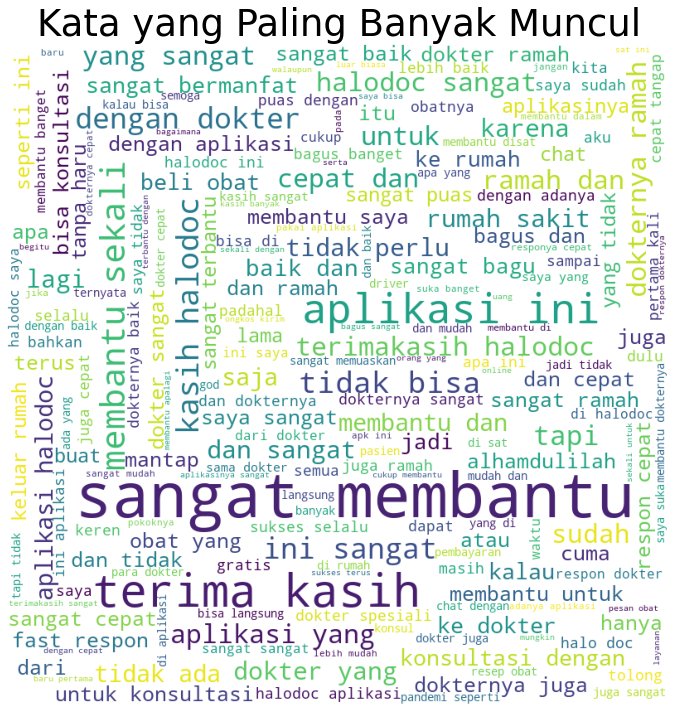

In [15]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (10,10), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.title("Kata yang Paling Banyak Muncul", fontsize = 37)
plt.tight_layout(pad = 1) 
  
plt.show() 

## Kamus

In [ ]:
with open('drive/My Drive/Dataset/Kamus/kata_sentimen_negatif.txt', 'r',encoding='utf-8-sig') as data:
    plaintext1 = data.read()
    plaintext1 = plaintext1.rstrip()
    
with open('drive/My Drive/Dataset/Kamus/kata_sentimen_positif.txt', 'r',encoding='utf-8-sig') as data:
    plaintext2 = data.read()
    plaintext2 = plaintext2.rstrip()
    
with open("drive/My Drive/Dataset/Kamus/kata_sentimen_fix.txt", 'w') as f:
    f.write(plaintext1 + '\n')
    f.write(plaintext2 + '\n')

with open("drive/My Drive/Dataset/Kamus/kata_sentimen_fix.txt", 'r') as f:
    sentifix = f.read()
sentifix = sentifix.replace(',', '\t')

with open("drive/My Drive/Dataset/Kamus/sentifix.txt", 'w') as f:
    f.write(sentifix + '\n')

In [ ]:
sentifix = pd.read_csv('drive/My Drive/Dataset/Kamus/sentifix.txt',sep="\t",header=None)
sentifix.columns = ['word','weight']
sentifix.head()

,word,weight
0,kali,-1
1,terbatas,-3
2,penyebabnya,-4
3,positif,-1
4,korona,-2


In [ ]:
tambah = pd.read_csv('drive/My Drive/Dataset/Kamus/sentimentword.csv')

In [ ]:
#Cek data yang kosong ini yang AggusMakmum Sentiword.csv
tambah.isnull().sum()

word      0
weight    0
dtype: int64

In [ ]:
#cek data sentifix yang kosong
sentifix.isnull().sum()

word      0
weight    0
dtype: int64

In [ ]:
lexicon_word = sentifix['word'].to_list()

In [ ]:
# cek data apakan ada data pada index 0 di lexicon_word
sentifix['word'][0] in lexicon_word

True

In [ ]:
add_word = []
add_weight = []
for i in range(0, len(tambah)):
  if(tambah['word'][i] not in lexicon_word):
    add_word.append(tambah['word'][i])
    add_weight.append(tambah['weight'][i])

#buat dataframe baru
addition_lexicon = pd.DataFrame(list(zip(add_word,add_weight )),columns =['word','weight'])

In [ ]:
addition_lexicon

,word,weight
0,acuh,-1
1,agresi,-3
2,ajaib,3
3,akal,2
4,alarm,-3
...,...,...
821,waktunya,-2
822,waspadalah,-2
823,wow,3
824,wtf,-3


In [ ]:
#Gabungin sama yang sentifix
full_lexicon = sentifix.append(addition_lexicon,ignore_index = True)

In [ ]:
full_lexicon.sample(5)

,word,weight
5819,solokan,-4
6379,perhiasan,-4
2323,suka,-1
2179,gede,-2
7893,kliyengan,1


In [ ]:
full_lexicon[full_lexicon['weight']<0].min() #cek yang paling besar weightnya

word      (barang) bekas
weight                -5
dtype: object

In [ ]:
#tambahan lagi buat kata2 kasar
my_file = open("drive/My Drive/Dataset/Kamus/swearwords/swear-words.txt", "r")
content = my_file.read()
swear_words = content.split("\n")

In [ ]:
for i in swear_words:
  print(i)

In [ ]:
weight_swear = [-5 for i in range(len(swear_words))]

In [ ]:
swear_lexicon = pd.DataFrame(list(zip(swear_words,weight_swear)),columns =['word','weight'])

In [ ]:
swear_lexicon.head()

,word,weight
0,anjing,-5
1,anjiang,-5
2,anjir,-5
3,anjay,-5
4,asu,-5


In [ ]:
#gabungin datanya lagi sama yang sebelumnya
full_lexicon = sentifix.append(swear_lexicon,ignore_index = True)

In [ ]:
full_lexicon.head()

,word,weight
0,kali,-1
1,terbatas,-3
2,penyebabnya,-4
3,positif,-1
4,korona,-2


In [ ]:
full_lexicon.isnull().sum()

word      0
weight    0
dtype: int64

In [ ]:
full_lexicon.to_csv(r'drive/My Drive/Dataset/Kamus/full_lexicon.txt', header=None, index=None, sep='\t', mode='a')

In [17]:
kamus_sentimen = 'full_lexicon.txt'

def sentiment_dict(kamus_sentimen):
    ''' (file) -> dictionary
This method should take your sentiment file
and create a dictionary in the form {word: value}
'''    
    kamus = open(kamus_sentimen)
    scores = {} # initialize an empty dictionary
    for line in kamus:
        term, score = line.split("\t") # The file is comma-delimited. 
        scores[term] = int(score) # Convert the score to an integer.

    return scores

In [18]:
import codecs

doc = codecs.open('Kamus/full_lexicon.txt','rU','UTF-8') #open for reading with "universal" type set

kamus = pd.read_csv(doc, sep='\t', header=None)
kamus

,0,1
0,kali,-1
1,terbatas,-3
2,penyebabnya,-4
3,positif,-1
4,korona,-2
...,...,...
10297,silit,-5
10298,sontoloyo,-5
10299,tai,-5
10300,telek,-5


## Labeling (Lexicon)

In [19]:
kamus = kamus.set_index(0).T.to_dict('records')
dct = {}
for item in kamus:
    dct.update(item)

#dct

<ipython-input-19-53211162accb>:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  kamus = kamus.set_index(0).T.to_dict('records')


In [20]:
data = df1['Remove_noise']
skor = []

for line in data:
    tweet_word = line.split()
    #sent_score is a variable which will take care of word strength / word weightage
    sum_score = 0
    sent_score = 0
    l = len(tweet_word)
    #print(l)
    
    for word in tweet_word:
        word = word.rstrip('?:!.,;"!@')
        word = word.replace("\n", "")

        if word in dct.keys():
            sum_score += int(dct[word])\
    
    skor.append(sum_score)


print(len(skor))
# print(tweet_word)
#print(l)

19223


In [21]:
print(skor[10])

10


In [22]:
#skor
df1['nilai'] = skor
df1.tail(10)

,Remove_noise,nilai
19213,saya sangat puas dengan aplikasi ini dokternya...,11
19214,sangat berguna sekali fast respon,9
19215,aplikasi yang bagus karena langsung di jawab s...,-1
19216,terimaksih sudah membuat aplikasi yang berguna...,7
19217,apl yang sangat membantu tingkatkan terus kawa...,6
19218,terimakasih sangat membantu semoga kedepanya b...,14
19219,pelayanan yang luar biasa tengah malam tetap d...,14
19220,terimakasih aplikasi yang sangat membantu dan ...,1
19221,aplikasinya bagus dokternya juga ramah pesan s...,13
19222,aplikasi yang sangat membatu apa lagi kalau ba...,-8


In [23]:
df1.head(10)

,Remove_noise,nilai
0,jadi gampang konsultasi dari rumah,8
1,aplikasi cacat download kartu kendali tidak bi...,-20
2,salut dengan tetap menjaga kualitas pelayanany...,1
3,mudah dan terpercaya,4
4,mudah dan sangat membantu terimakasih,16
5,waktu konsul lebih dulu habis tanpa ada muncul...,-2
6,sangat terbantu sekali terimakasih,7
7,apk ini sangat membantu apalagi di jaman pande...,-1
8,tolong kasi pilihan untuk perpanjang waktu kon...,24
9,sangat cepat respon dokter aman dan nyaman,12


In [24]:
def f(row):
    if row['nilai'] > 3 :
        val = 'positif'
    elif row['nilai'] < -2 :
        val = 'negatif'
    else:
        val = 'netral'
    return val

df1['sentimen'] = df1.apply(f, axis = 1)
df1

,Remove_noise,nilai,sentimen
0,jadi gampang konsultasi dari rumah,8,positif
1,aplikasi cacat download kartu kendali tidak bi...,-20,negatif
2,salut dengan tetap menjaga kualitas pelayanany...,1,netral
3,mudah dan terpercaya,4,positif
4,mudah dan sangat membantu terimakasih,16,positif
...,...,...,...
19218,terimakasih sangat membantu semoga kedepanya b...,14,positif
19219,pelayanan yang luar biasa tengah malam tetap d...,14,positif
19220,terimakasih aplikasi yang sangat membantu dan ...,1,netral
19221,aplikasinya bagus dokternya juga ramah pesan s...,13,positif


In [25]:
df1.to_csv('Labeling.csv', encoding='utf8', index=False)

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.read_csv('Labeling.csv')

## Visualiisasi Data Sentimen

In [44]:
positif1=df1.loc[df1['nilai'] > 15].head()
negatif1 = df1.loc[df1['nilai'] < -25].head()
netral1 = df1.loc[df1['nilai'] == -1].head()
headings1 = positif1.columns
headings1

Index(['Remove_noise', 'nilai', 'sentimen'], dtype='object')

In [45]:
senti_count = df1['sentimen'].value_counts()
print(type(senti_count))
print(senti_count)

<class 'pandas.core.series.Series'>
positif    11387
negatif     4502
netral      3334
Name: sentimen, dtype: int64


In [46]:
senti_count2=list(zip(str(senti_count),str(senti_count.index)))
senti_count2=tuple(zip(senti_count,senti_count.index))
kolom=[(sub[1], sub[0]) for sub in senti_count2]
kolom

[('positif', 11387), ('negatif', 4502), ('netral', 3334)]

In [47]:
labels=[]
values=[]
for row in kolom:
    labels.append(row[0])
    values.append(row[1])
print(labels)
print(values)

['positif', 'negatif', 'netral']
[11387, 4502, 3334]


Text(0.5, 1.02, 'Sentimen')

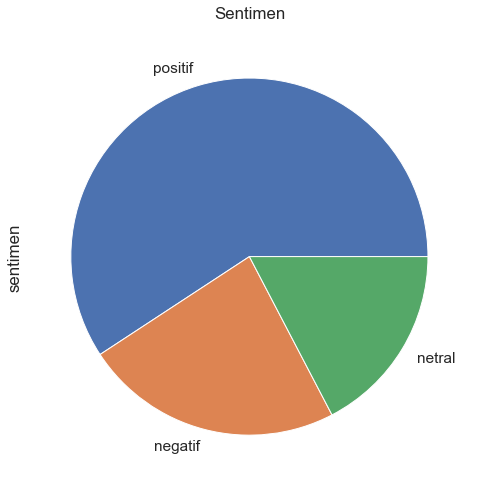

In [48]:
sns.set(font_scale=1.4)
senti_count.plot(kind='pie', figsize=(8, 10))#, rot=0)
plt.title("Sentimen", y=1.02)

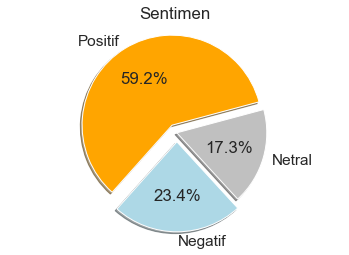

In [49]:
my_labels = 'Positif','Negatif','Netral'
my_colors = ['orange','lightblue','silver']
my_explode = (0.1, 0.1, 0)
plt.pie(senti_count, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Sentimen')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Sentimen')

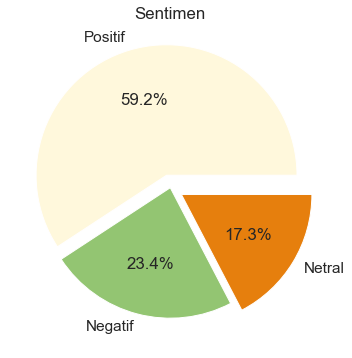

In [62]:
labels = 'Positif','Negatif','Netral'
colors = ('#FFF8DC', '#93C572', '#E67F0D')
explode = (0.1, 0, 0.1)
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(senti_count, labels = labels, autopct='%1.1f%%',explode=explode, colors = colors)
ax.set_title('Sentimen')

## LSTMnya Gan

In [31]:
# Diubah ke kategorical pake one hot encoding untuk merubah kolom sentiment
sentimen = pd.get_dummies(df1.sentimen,prefix='sentimen')
df1 = pd.concat([df1, sentimen], axis=1)
df1 = df1.drop(columns='nilai')
df1

,Remove_noise,sentimen,sentimen_negatif,sentimen_netral,sentimen_positif
0,jadi gampang konsultasi dari rumah,positif,0,0,1
1,aplikasi cacat download kartu kendali tidak bi...,negatif,1,0,0
2,salut dengan tetap menjaga kualitas pelayanany...,netral,0,1,0
3,mudah dan terpercaya,positif,0,0,1
4,mudah dan sangat membantu terimakasih,positif,0,0,1
...,...,...,...,...,...
19218,terimakasih sangat membantu semoga kedepanya b...,positif,0,0,1
19219,pelayanan yang luar biasa tengah malam tetap d...,positif,0,0,1
19220,terimakasih aplikasi yang sangat membantu dan ...,netral,0,1,0
19221,aplikasinya bagus dokternya juga ramah pesan s...,positif,0,0,1


In [32]:
#save
df1.to_csv('TinggalTrain2.csv', encoding='utf8', index=False)

In [34]:
import pandas as pd

df1 = pd.read_csv('TinggalTrain2.csv')
df1.head()

,Remove_noise,sentimen,sentimen_negatif,sentimen_netral,sentimen_positif
0,jadi gampang konsultasi dari rumah,positif,0,0,1
1,aplikasi cacat download kartu kendali tidak bi...,negatif,1,0,0
2,salut dengan tetap menjaga kualitas pelayanany...,netral,0,1,0
3,mudah dan terpercaya,positif,0,0,1
4,mudah dan sangat membantu terimakasih,positif,0,0,1


In [35]:
sentimen = df1['Remove_noise'].values
label = df1[['sentimen_negatif', 'sentimen_netral',
       'sentimen_positif']].values

In [36]:
# Membagi data menjadi 90% data train dan 10% data test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sentimen, label, test_size=0.1)

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer # Mengimport tokenizer untuk preprocessing kata-kata
from tensorflow.keras.preprocessing.sequence import pad_sequences # Mengimport pad_sequences untuk preprocessing kata

# Memasukkan fungsi tokenizer yang didalamnya terdapat parameter untuk menyimpan 6500 kata yang sering muncul
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(x_train) 
tokenizer.fit_on_texts(x_test)

# Memasukkan data train dan test ke dalam sequence
sekuens_latih = tokenizer.texts_to_sequences(x_train)
sekuens_test = tokenizer.texts_to_sequences(x_test)

# Menggunakan padding agar sequence menjadi sama panjang
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [38]:
import pickle

# saving
with open('tokenizer_2.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [39]:
tokenIndexKata=tokenizer.word_index
print(tokenIndexKata)

{'<OOV>': 1, 'sangat': 2, 'dan': 3, 'membantu': 4, 'yang': 5, 'saya': 6, 'dokter': 7, 'tidak': 8, 'halodoc': 9, 'aplikasi': 10, 'ini': 11, 'bisa': 12, 'di': 13, 'dengan': 14, 'cepat': 15, 'untuk': 16, 'obat': 17, 'kasih': 18, 'dokternya': 19, 'ramah': 20, 'sekali': 21, 'terima': 22, 'konsultasi': 23, 'juga': 24, 'bagus': 25, 'baik': 26, 'ada': 27, 'banget': 28, 'sudah': 29, 'terimakasih': 30, 'tapi': 31, 'ke': 32, 'respon': 33, 'dari': 34, 'lagi': 35, 'langsung': 36, 'sakit': 37, 'rumah': 38, 'mudah': 39, 'karena': 40, 'jadi': 41, 'apa': 42, 'kita': 43, 'kalau': 44, 'lebih': 45, 'sat': 46, 'semoga': 47, 'harus': 48, 'pelayanan': 49, 'saja': 50, 'chat': 51, 'buat': 52, 'sama': 53, 'banyak': 54, 'dalam': 55, 'kesehatan': 56, 'bermanfat': 57, 'selalu': 58, 'terus': 59, 'perlu': 60, 'pakai': 61, 'puas': 62, 'seperti': 63, 'resep': 64, 'suka': 65, 'sampai': 66, 'aplikasinya': 67, 'semua': 68, 'waktu': 69, 'dapat': 70, 'beli': 71, 'konsul': 72, 'baru': 73, 'lama': 74, 'tanpa': 75, 'sukses': 

In [40]:
sampel_data=['halodoc aplikasi telemedicine yang sangat membantu saat pandemo covid saat ini    ']
tokenizer2 = Tokenizer(num_words=100, oov_token='<OOV>')
tokenizer2.fit_on_texts(sampel_data)
tokenIndexKata=tokenizer2.word_index

sekuens_sampel = tokenizer2.texts_to_sequences(sampel_data)

padded_sampel = pad_sequences(sekuens_sampel)

print(tokenIndexKata)
print(sekuens_sampel)
print(padded_sampel)

{'<OOV>': 1, 'saat': 2, 'halodoc': 3, 'aplikasi': 4, 'telemedicine': 5, 'yang': 6, 'sangat': 7, 'membantu': 8, 'pandemo': 9, 'covid': 10, 'ini': 11}
[[3, 4, 5, 6, 7, 8, 2, 9, 10, 2, 11]]
[[ 3  4  5  6  7  8  2  9 10  2 11]]


In [41]:
# Membuat kelas dan fungsi agar proses training berhenti saat akurasi validasi model telah mencapai 92%
import tensorflow as tf

class myCallBack(tf.keras.callbacks.Callback):    
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') >= 0.85):
            print("\nAkurasi validasi telah mencapai > 85%!")
            self.model.stop_training = True
myCallBack = myCallBack()

In [42]:
import os 
from tensorflow.keras.callbacks import ModelCheckpoint

# Fungsi untuk menyimpan model
save_direc = os.path.join(os.getcwd(), 'Dataset/')

model_name = 'model2.ckpt'
model_name2 = 'model_baru.ckpt'

# Membuat directory untuk menyimpan model
if not os.path.isdir(save_direc):
    os.makedirs(save_direc)

# Menggabungkan directory dengan model
modelpath = os.path.join(save_direc, model_name2)

checkpoint = ModelCheckpoint(filepath = modelpath, verbose = 2, monitor='val_accuracy',
                             save_best_only = True, save_weights_only = True)#,save_freq=1)

In [43]:
from tensorflow.keras import regularizers # Library untuk mencegah overfitting pada model
from tensorflow.keras.optimizers import RMSprop # mengimport optimizer untuk model

# Membuat model Sequential dengan Bidirectional LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 32), # 6500 input & 32 layer embedding
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)), # 64 layer LSTM
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)), # 32 layer LSTM
    tf.keras.layers.Dense(64, activation='relu'), # Menambah layer dan menggunakan relu sebagai fungsi aktivasi
    tf.keras.layers.Dropout(0.5), # Menggunakan dropout agar model tidak overfitting
    tf.keras.layers.Dense(3, activation='softmax') # Outputnya adalah 3 dan karena kategorikal menggunakan aktivasi softmax
])

model.summary() # Melihat shape dan parameter model
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.0001),metrics=['accuracy']) # Menggunakan optimizer RMSprop dengan learning rate 0.0001

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          160000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        49664     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1

In [44]:
#batch_size = 16
history = model.fit(padded_latih, y_train, validation_data=(padded_test, y_test), epochs=350,#batch_size=batch_size,
                    steps_per_epoch= 30, callbacks=[myCallBack, checkpoint], verbose=2)

Epoch 1/350

Epoch 1: val_accuracy improved from -inf to 0.61310, saving model to C:\Users\P3D0\Dataset\model_baru.ckpt
30/30 - 31s - loss: 1.0615 - accuracy: 0.5849 - val_loss: 1.0146 - val_accuracy: 0.6131 - 31s/epoch - 1s/step
Epoch 2/350

Epoch 2: val_accuracy did not improve from 0.61310
30/30 - 10s - loss: 0.9819 - accuracy: 0.5899 - val_loss: 0.9215 - val_accuracy: 0.6131 - 10s/epoch - 320ms/step
Epoch 3/350

Epoch 3: val_accuracy did not improve from 0.61310
30/30 - 10s - loss: 0.9398 - accuracy: 0.5903 - val_loss: 0.8938 - val_accuracy: 0.6131 - 10s/epoch - 330ms/step
Epoch 4/350

Epoch 4: val_accuracy improved from 0.61310 to 0.61362, saving model to C:\Users\P3D0\Dataset\model_baru.ckpt
30/30 - 10s - loss: 0.9143 - accuracy: 0.5920 - val_loss: 0.8672 - val_accuracy: 0.6136 - 10s/epoch - 346ms/step
Epoch 5/350

Epoch 5: val_accuracy improved from 0.61362 to 0.65211, saving model to C:\Users\P3D0\Dataset\model_baru.ckpt
30/30 - 10s - loss: 0.8861 - accuracy: 0.6124 - val_loss:

In [12]:
# Save modelnya gan
# import os

# os.makedirs('drive/My Drive/Dataset/models/')          # Creating a directory
model.save('Dataset/models/lstmModellocal_baru.h5')   # Saving model

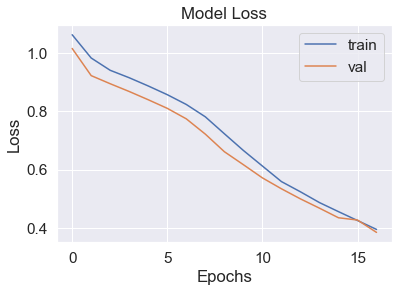

In [45]:
# Menampilkan plot loss dari model

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

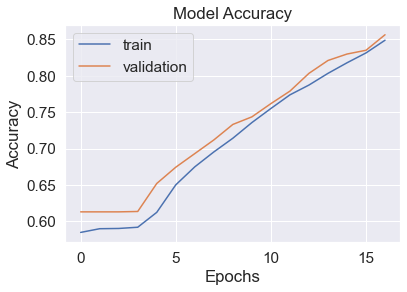

In [46]:
# Menampilkan plot akurasi dari model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

## Test Model

In [47]:
loss, acc = model.evaluate(padded_test, y_test, verbose=1)
                            #batch_size=batch_size)
print("loss:", loss)
print("Validation accuracy:", acc)

61/61 [==============================] - 1s 18ms/step - loss: 0.3846 - accuracy: 0.8565
loss: 0.3846394717693329
Validation accuracy: 0.8564742803573608


In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np

def model_evaluate(): 
    # predict class with test set
    predict_x=model.predict(padded_test, verbose=0)
    classes_x=np.argmax(predict_x,axis=1)
    y_pred_test =  classes_x
    print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
    
    #classification report
    print('\n')
    print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

    #confusion matrix
    confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test)

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

Accuracy:	85.6%


              precision    recall  f1-score   support

           0       0.80      0.92      0.86       415
           1       0.65      0.46      0.54       329
           2       0.92      0.94      0.93      1179

    accuracy                           0.86      1923
   macro avg       0.79      0.77      0.78      1923
weighted avg       0.85      0.86      0.85      1923



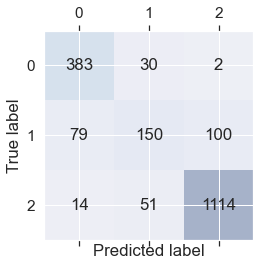

In [49]:
model_evaluate()

In [50]:
import numpy as np

twt = ['suka bangettt sama halodoc dokternya ramah ramah']
print(twt)
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
#print(twt)
sentiment = model.predict(twt)[0]
if(np.argmax(sentiment) == 0):
    print('Sentimen: Negatif')
elif (np.argmax(sentiment) == 1):
    print('Sentimen: Netral')
else :
    print('Sentimen: Positif')
print(sentiment)

['suka bangettt sama halodoc dokternya ramah ramah']
Sentimen: Positif
[0.0034377  0.04685787 0.9497044 ]


In [51]:
twt = ['saya baru saja mencoba untuk berkonsultasi dengan dokter saya juga sudah menyelesaikan pembayaran tapi ketika dihubungkan dengan dokter yang bersangkutan tidak juga kunjung tersambung sampai saya mencoba berkali² uang saya hangus percuma']
print(twt)
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
#print(twt)
sentiment = model.predict(twt)[0]
print(sentiment)
if(np.argmax(sentiment) == 0):
    print('Sentimen: Negatif')
elif (np.argmax(sentiment) == 1):
    print('Sentimen: Netral')
else :
    print('Sentimen: Positif')

['saya baru saja mencoba untuk berkonsultasi dengan dokter saya juga sudah menyelesaikan pembayaran tapi ketika dihubungkan dengan dokter yang bersangkutan tidak juga kunjung tersambung sampai saya mencoba berkali² uang saya hangus percuma']
[0.46657863 0.2970356  0.23638579]
Sentimen: Negatif


In [52]:
twt = ['aplikasinya membantu tapi bermasalah pada saat pembayaran menggunakan debit']
print(twt)
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
#print(twt)
sentiment = model.predict(twt)[0]
print(sentiment)
if(np.argmax(sentiment) == 0):
    print('Sentimen: Negatif')
elif (np.argmax(sentiment) == 1):
    print('Sentimen: Netral')
else :
    print('Sentimen: Positif')

['aplikasinya membantu tapi bermasalah pada saat pembayaran menggunakan debit']
[0.3497005  0.35109726 0.29920226]
Sentimen: Netral


## load model coba

In [31]:
peler =  tf.keras.models.load_model('Dataset/models/lstmModellocal2.h5')

In [32]:
peler.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          208000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        49664     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 128)               1

In [33]:
loss, acc = peler.evaluate(padded_test, y_test, verbose=1)
                            #batch_size=batch_size)
print("loss:", loss)
print("Validation accuracy:", acc)

61/61 [==============================] - 2s 16ms/step - loss: 0.4286 - accuracy: 0.8596
loss: 0.428642600774765
Validation accuracy: 0.8595944046974182


In [34]:
import numpy as np

twt = ['aplikasi bangsat bikin riibet']
print(twt)
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
#print(twt)
sentiment = peler.predict(twt)[0]
if(np.argmax(sentiment) == 0):
    print('Sentimen: Negatif')
elif (np.argmax(sentiment) == 1):
    print('Sentimen: Netral')
else :
    print('Sentimen: Positif')
print(sentiment)

['aplikasi bangsat bikin riibet']
Sentimen: Negatif
[0.606252   0.27214777 0.12160018]


## ini klo butuh weightnya

In [52]:
model.load_weights('Dataset/model3.ckpt')

In [53]:
loss, acc = model.evaluate(padded_test, y_test, verbose=1)
                            #batch_size=batch_size)
print("loss:", loss)
print("Validation accuracy:", acc)

61/61 [==============================] - 1s 13ms/step - loss: 0.3386 - accuracy: 0.8674
loss: 0.3386068046092987
Validation accuracy: 0.8673946857452393


In [57]:
import numpy as np

twt = ['suka bangettt sama halodoc dokternya ramah ramah']
print(twt)
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
#print(twt)
sentiment = model1.predict(twt)[0]
if(np.argmax(sentiment) == 0):
    print('Sentimen: Negatif')
elif (np.argmax(sentiment) == 1):
    print('Sentimen: Netral')
else :
    print('Sentimen: Positif')
print(sentiment)

['suka bangettt sama halodoc dokternya ramah ramah']
Sentimen: Negatif
[0.33702904 0.32999632 0.33297467]


In [64]:
loss, acc = model.evaluate(padded_test, y_test, verbose=1)
                            #batch_size=batch_size)
print("loss:", loss)
print("Validation accuracy:", acc)

61/61 [==============================] - 1s 17ms/step - loss: 0.3520 - accuracy: 0.8580
loss: 0.3520456850528717
Validation accuracy: 0.8580343127250671
